In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers import Flatten,BatchNormalization
from keras.layers import Dropout,Conv1D,MaxPooling1D,LSTM
from sklearn.preprocessing import OneHotEncoder,label_binarize,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [64]:
data=pd.read_csv("emotions.csv")

In [65]:
data.shape

(2132, 2549)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [67]:
data.isna().sum().sum()

0

In [68]:
data['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [69]:
labels={'NEGATIVE':0, 'NEUTRAL':1, 'POSITIVE':2}

In [70]:
data['label']=data['label'].replace(labels)

In [71]:
X=data.drop(['label'],axis=1)

In [72]:
X

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,74.3,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,130.0,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,-534.0,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,-183.0,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,114.0,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,155.0,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,-661.0,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,-232.0,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,-99.7,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00


In [73]:
y=data[['label']]

In [74]:
y

,label
0,0
1,1
2,2
3,2
4,1
...,...
2127,1
2128,2
2129,0
2130,0


In [75]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X)

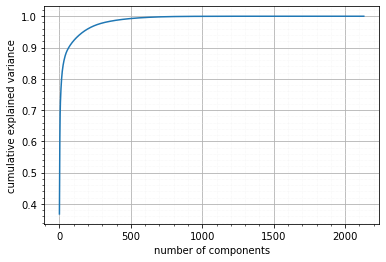

In [76]:
pca = PCA().fit(X_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.minorticks_on()
plt.show()

In [77]:
pca = PCA(n_components = 145)
X_trans = pca.fit_transform(X_new)

In [78]:
X_fin = pd.DataFrame(data=X_trans)
X_fin.head(10)

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,35.657801,22.587212,-22.876329,-0.402041,0.135878,0.300305,0.371889,-5.019778,-3.524267,1.259205,...,-1.073989,1.112792,0.484252,-1.328488,1.012020,1.841823,0.665817,0.130213,0.136642,0.653206
1,-21.885579,-2.029729,0.034290,-1.610424,-0.794432,0.119247,-0.723485,5.503747,-1.909677,-0.405101,...,0.566397,-0.846952,0.277793,0.911860,-0.194547,-1.325311,-0.616971,0.706055,2.863567,-0.048661
2,35.274053,-14.873318,5.623630,-1.608727,0.594164,-7.690380,-0.609083,1.876396,2.300632,19.663583,...,-0.349464,1.379889,-3.223372,1.896990,-0.208509,-0.827991,0.468420,-0.173620,-0.779851,-0.946645
3,2.087139,-20.876049,24.824895,-1.996328,-0.399807,-0.460872,2.148957,-4.536861,-2.997985,2.219055,...,-1.601063,0.066693,-0.597190,-0.314052,0.314091,1.362785,-0.691442,2.824087,-0.268176,1.635012
4,-25.229455,-2.204738,0.925049,0.763751,0.181120,-3.126072,-1.850139,5.979478,3.539539,12.691276,...,1.397112,-2.105016,-0.537493,1.839465,0.346920,0.009447,0.114980,-0.637530,-0.353288,0.823189
5,-22.221918,-2.691883,0.407000,-1.202683,-0.756296,0.151724,-0.771160,6.233713,-2.761318,0.151608,...,-0.023232,-0.346864,-0.448827,-0.436473,-0.268092,0.289660,-0.198607,-0.004421,-1.095390,1.508299
6,-19.085045,-5.241313,0.941209,-0.812583,-1.164517,-0.883325,-1.201025,0.583197,3.916153,-0.962244,...,1.522169,0.564689,0.475212,-2.621168,0.018055,-0.302062,0.298633,-0.286391,0.489180,1.097221
7,2.710257,21.533988,-39.883499,1.684440,1.312737,1.307884,-0.297145,-2.087967,-3.444867,2.411370,...,0.586475,-0.456437,-0.507381,-0.349155,0.838403,-0.267357,-0.452120,0.957634,0.784448,-1.612383
8,-17.410045,-1.030366,-0.007529,-2.728940,-0.993025,2.049574,0.274726,-1.332270,1.974466,-5.244219,...,0.245304,0.423889,-1.001982,-1.165049,-0.172023,-2.531711,0.124362,1.053145,-0.189036,-1.718067
9,29.426873,13.365923,12.501691,-2.335001,-1.373872,-1.957218,-0.727321,-5.627730,-1.088296,0.775392,...,0.181819,-1.682738,0.153303,-0.935344,0.177576,0.190362,-0.706442,0.919592,-0.148506,-0.247999


In [79]:
X_fin=X_fin.values
y=y.values

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.25,random_state=42)

In [81]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [82]:
X_train.shape

(1279, 145)

In [83]:
y_train.shape

(1279, 1)

In [84]:
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='ovr', solver='liblinear')

In [85]:
y_pred=model.predict(X_test)

In [86]:
y_pred_train=model.predict(X_train)

In [87]:
y_pred_val=model.predict(X_val)

In [88]:
y_new=model.predict(X_fin)

In [89]:
train_acc=model.score(X_train,y_train)
print("Train Accuracy: {:.3f}%".format(train_acc * 100))

Train Accuracy: 99.765%


In [90]:
test_acc=model.score(X_test,y_test)
print("Test Accuracy: {:.3f}%".format(test_acc * 100))

Test Accuracy: 94.371%


In [91]:
val_acc=model.score(X_val,y_val)
print("Validation Accuracy: {:.3f}%".format(val_acc * 100))

Validation Accuracy: 93.750%


In [92]:
y_pred

array([1, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       2, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 2,
       0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0,
       2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1,
       1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0,
       0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2,
       2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0,

In [93]:
y_pred[12]

0

In [94]:
y_test[12]

array([0], dtype=int64)

In [95]:
y_test1=np.argmax(y_test, axis=1)

In [96]:
y_pred1=np.argmax(y_pred)

In [97]:
y_pred_train=model.predict(X_train)

In [98]:
y_pred_val=model.predict(X_val)

In [100]:
y_new=model.predict(X_fin)

In [101]:
confusion_matrix(y_test,y_pred)

array([[167,   0,  12],
       [  0, 174,   4],
       [ 10,   4, 162]], dtype=int64)

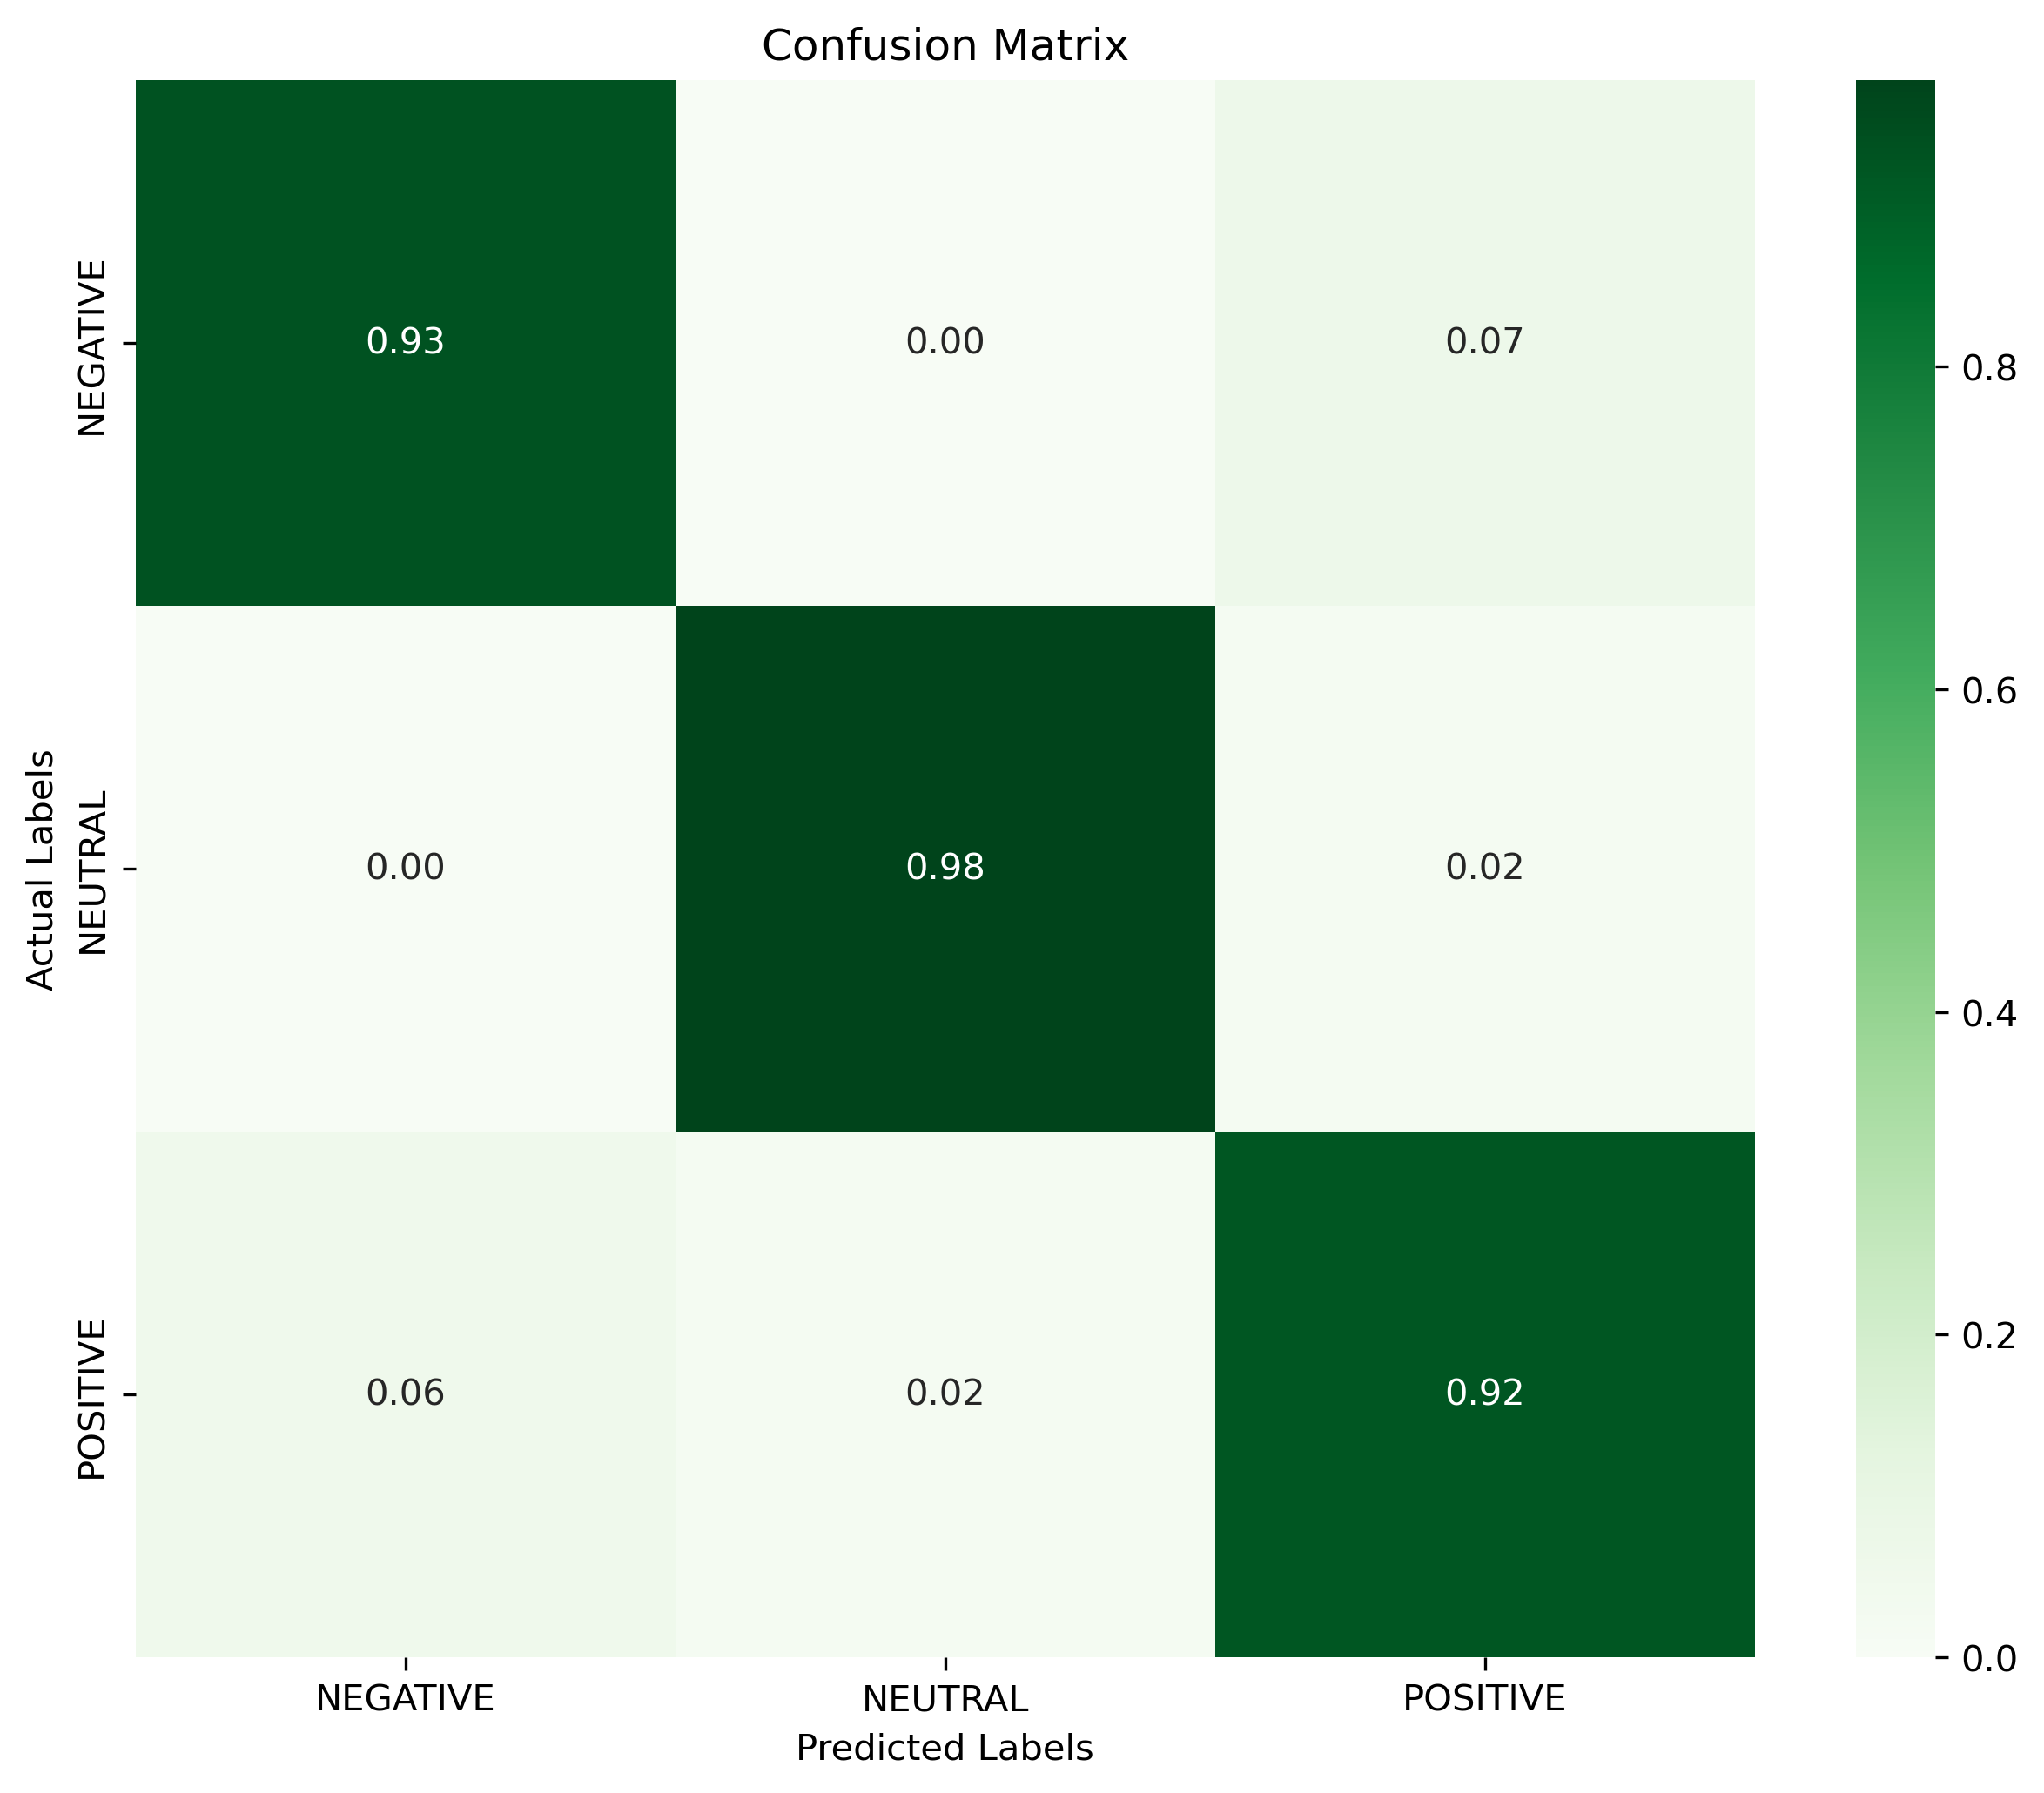

In [102]:
conf_matr = confusion_matrix(y_test, y_pred)

CLASSES=['NEGATIVE','NEUTRAL','POSITIVE']
cmn = conf_matr.astype('float') / conf_matr.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8), dpi=300)

ax=sns.heatmap(cmn, annot=True,fmt=".2f", cmap='Greens',xticklabels= CLASSES,
                yticklabels=CLASSES)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Confusion Matrix')
ax.figure.savefig('confmatrix.png',dpi=300,format='png')

In [103]:
print("classification_report\n",classification_report(y_test,y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       179
           1       0.98      0.98      0.98       178
           2       0.91      0.92      0.92       176

    accuracy                           0.94       533
   macro avg       0.94      0.94      0.94       533
weighted avg       0.94      0.94      0.94       533



In [104]:
y_test1=y_test.flatten()

In [105]:
pred_prob = model.predict_proba(X_test)

In [106]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test1,pred_prob,multi_class='ovo')

In [107]:
auc

0.9834249690426327

In [108]:
new_pred=label_binarize(y_pred,classes=np.unique(y_pred))
new_test=label_binarize(y_test1,classes=np.unique(y_test1))
classes=np.unique(y_pred)

In [109]:
from sklearn.metrics import roc_curve

In [110]:
y_train1=y_train.flatten()

In [111]:
new_train=label_binarize(y_train1,classes=np.unique(y_train1))

In [112]:
new_train_pred=label_binarize(y_pred_train,classes=np.unique(y_pred_train))

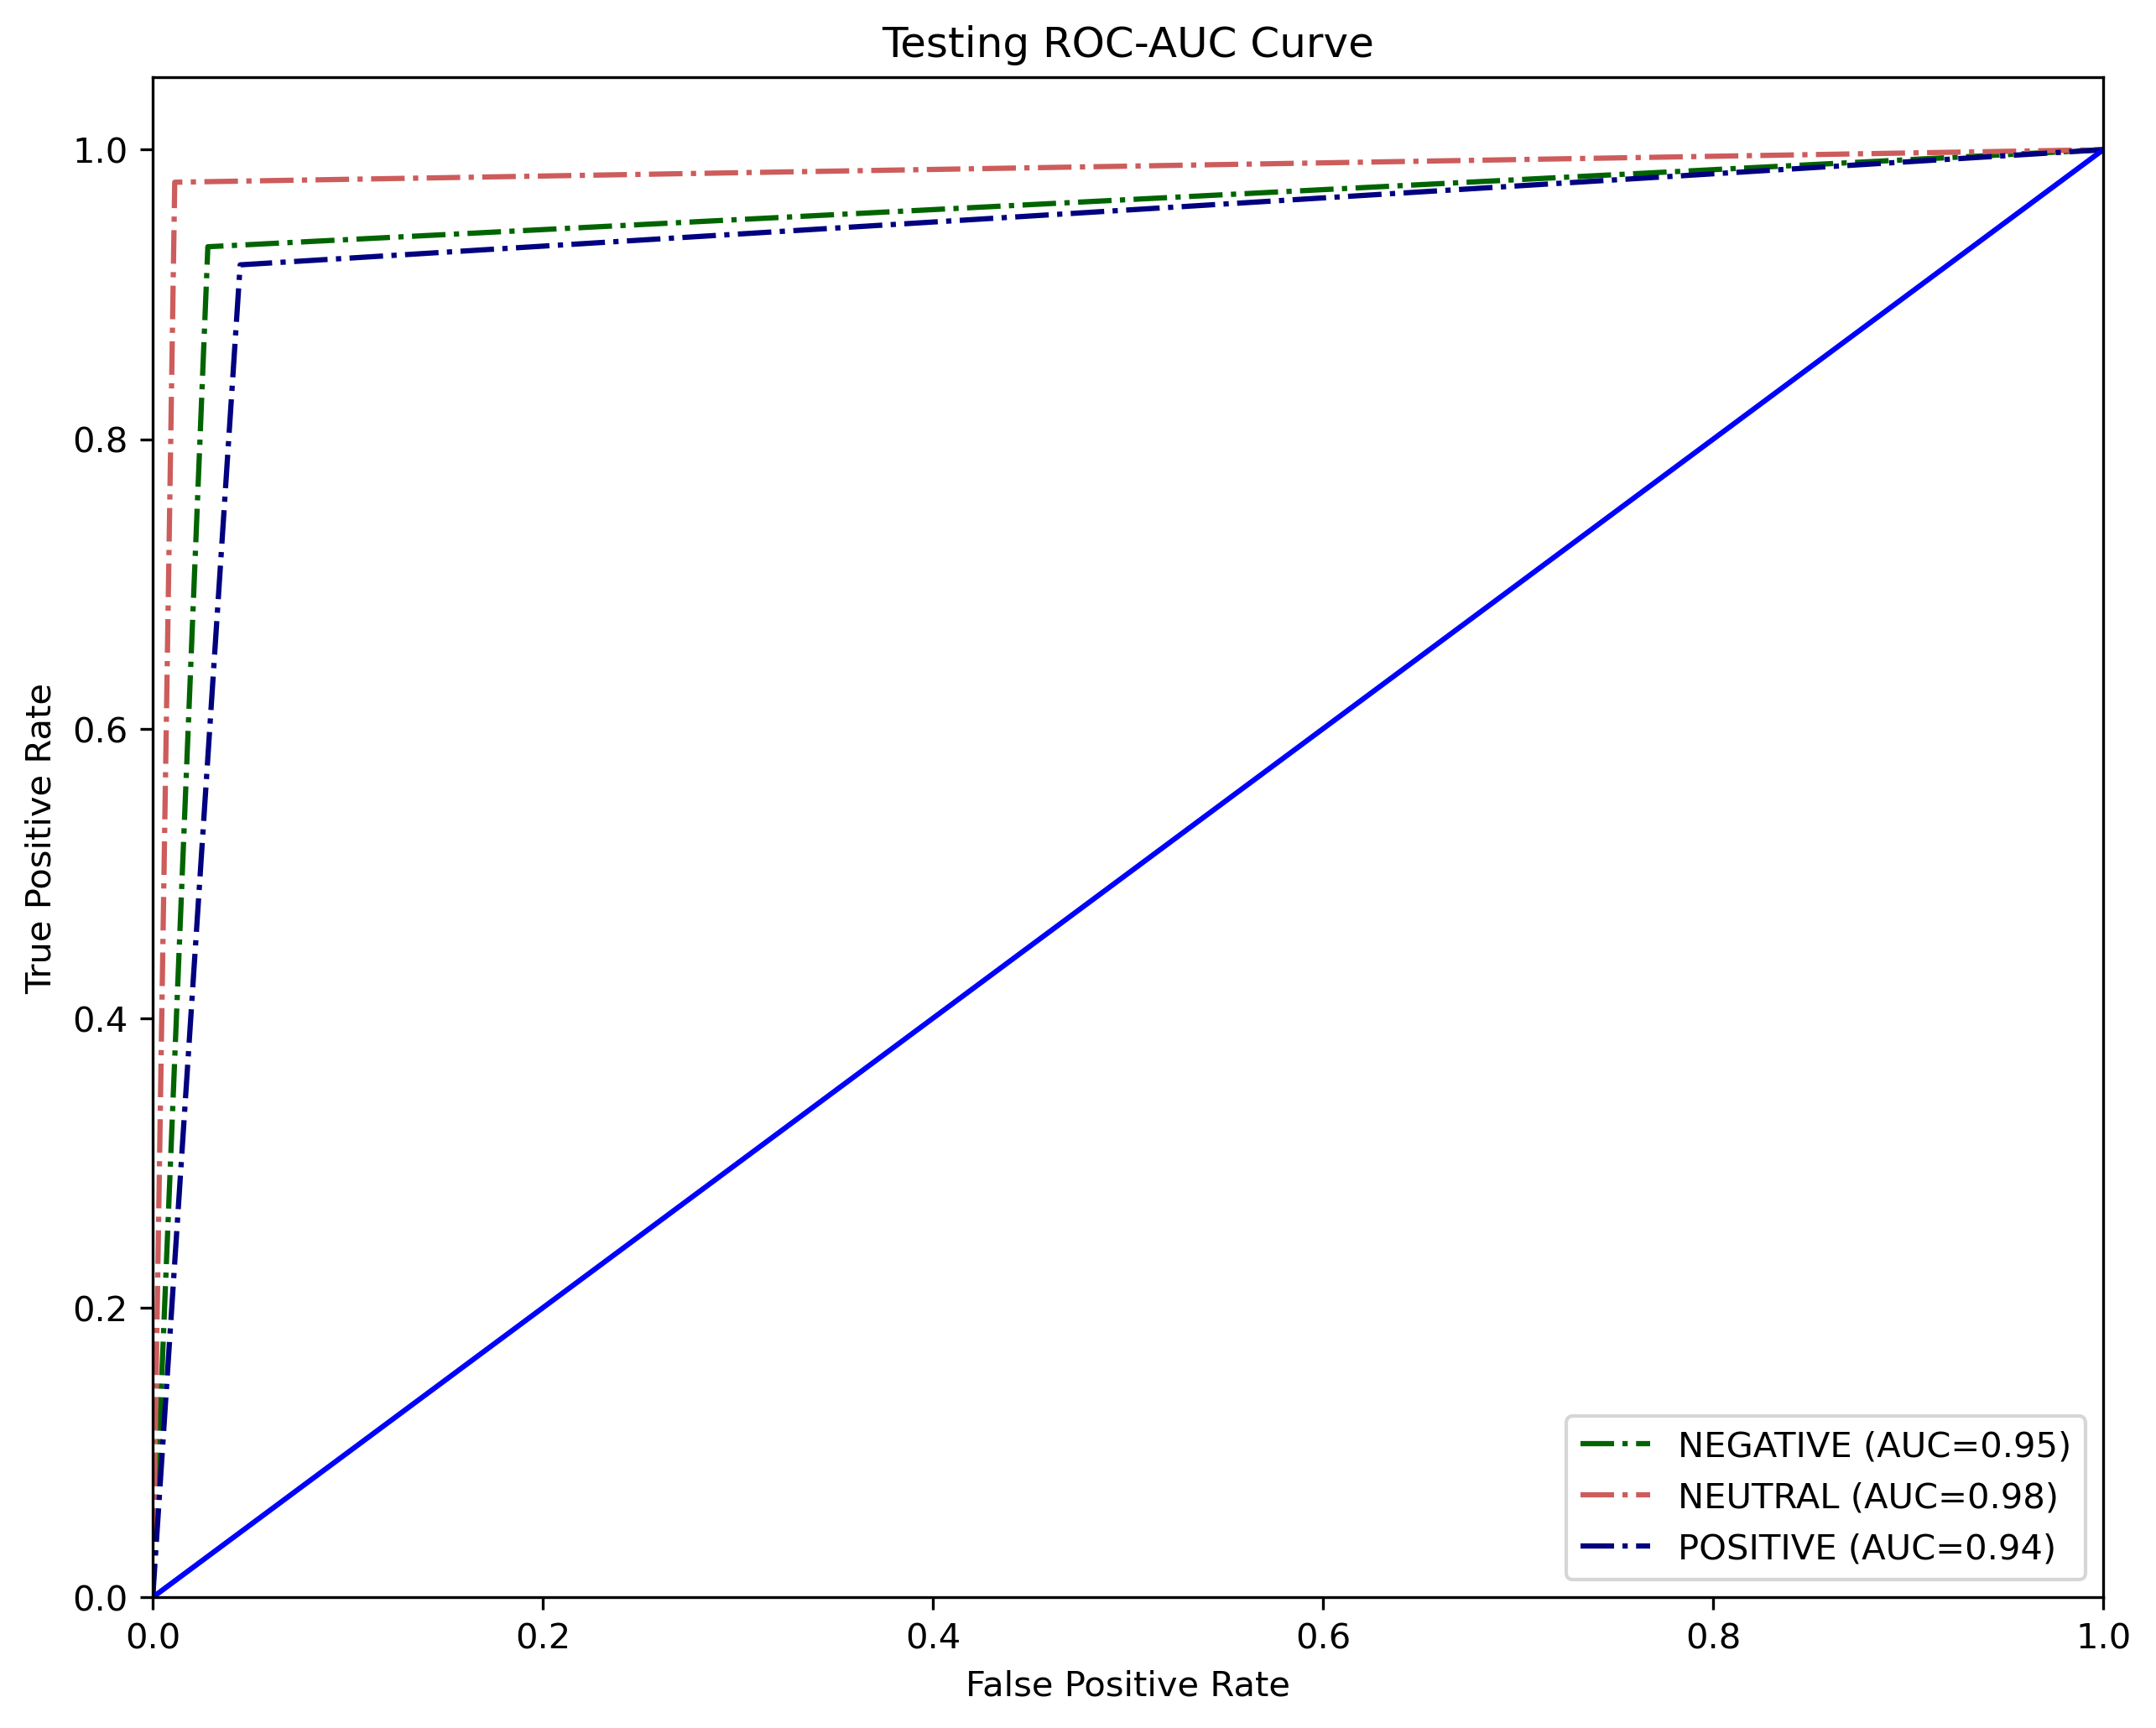

In [113]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10,8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(new_test[:,i],new_pred[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Testing ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Testing ROCAUC.png',dpi=300)

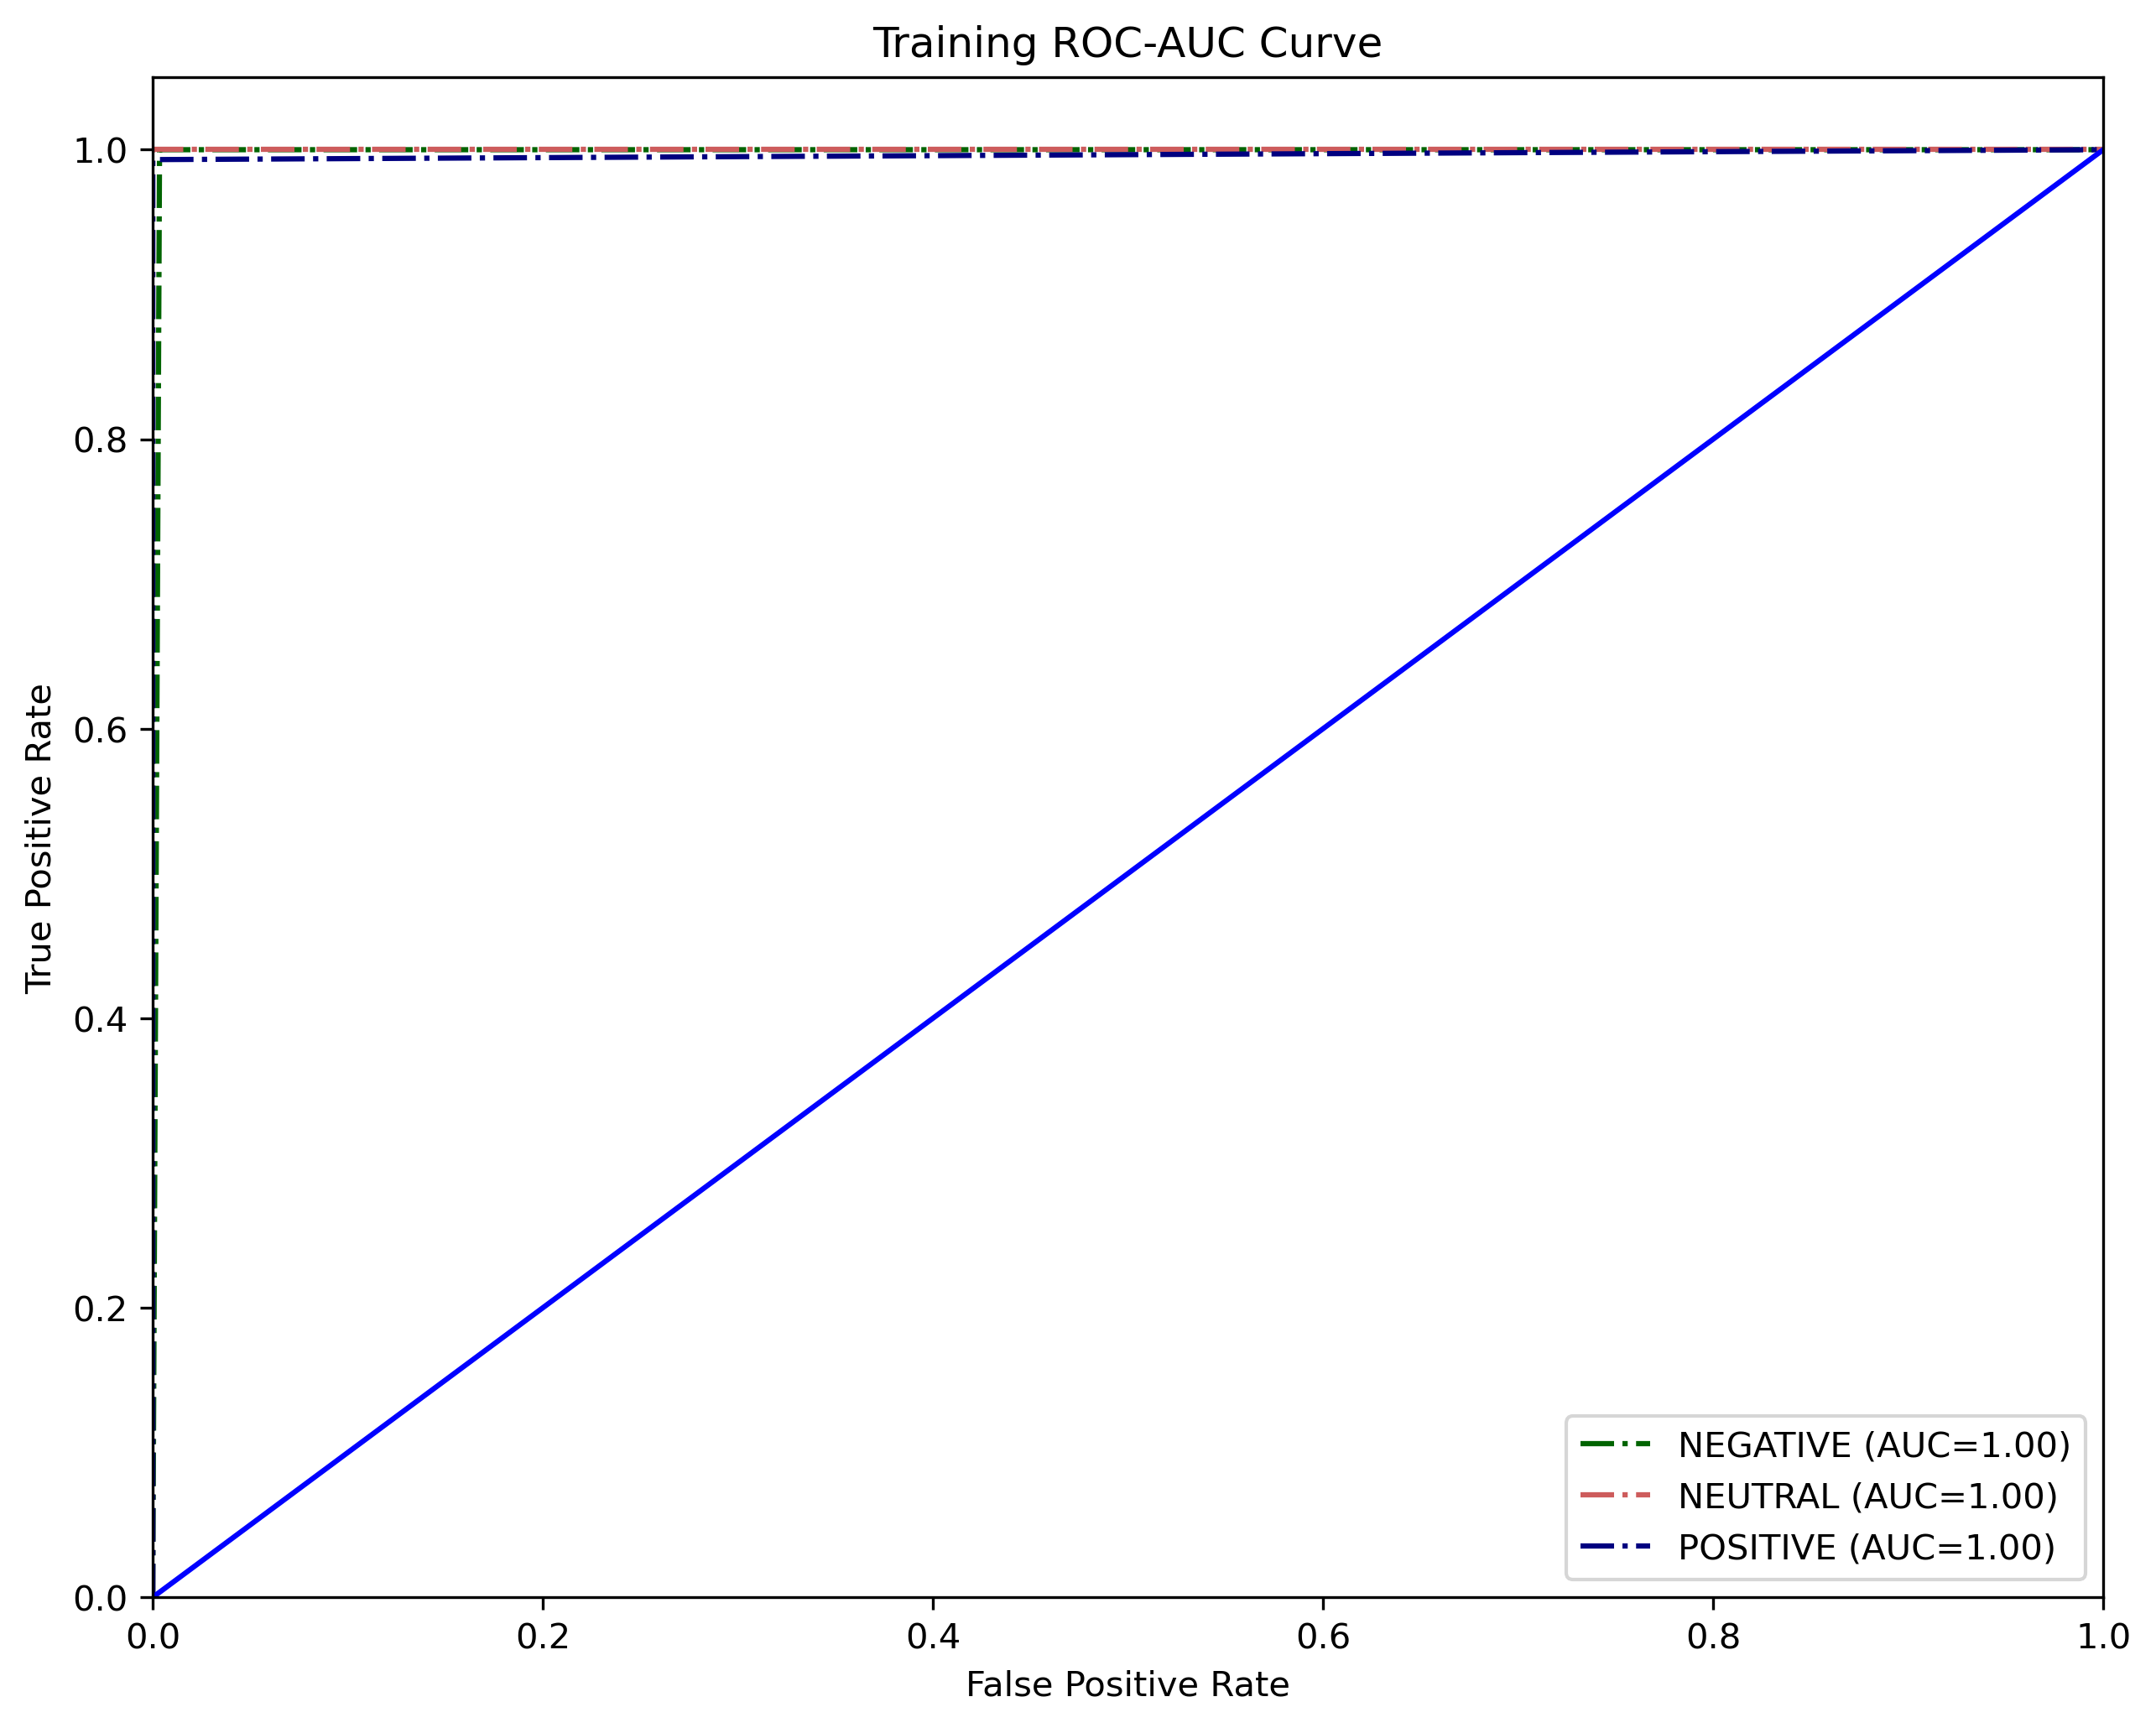

In [114]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(new_train[:,i],new_train_pred[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Training ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Training ROCAUC.png',dpi=300)

In [115]:
y_val1=y_val.flatten()
new_val=label_binarize(y_val1,classes=np.unique(y_val1))
new_pred_val=label_binarize(y_pred_val,classes=np.unique(y_pred_val))

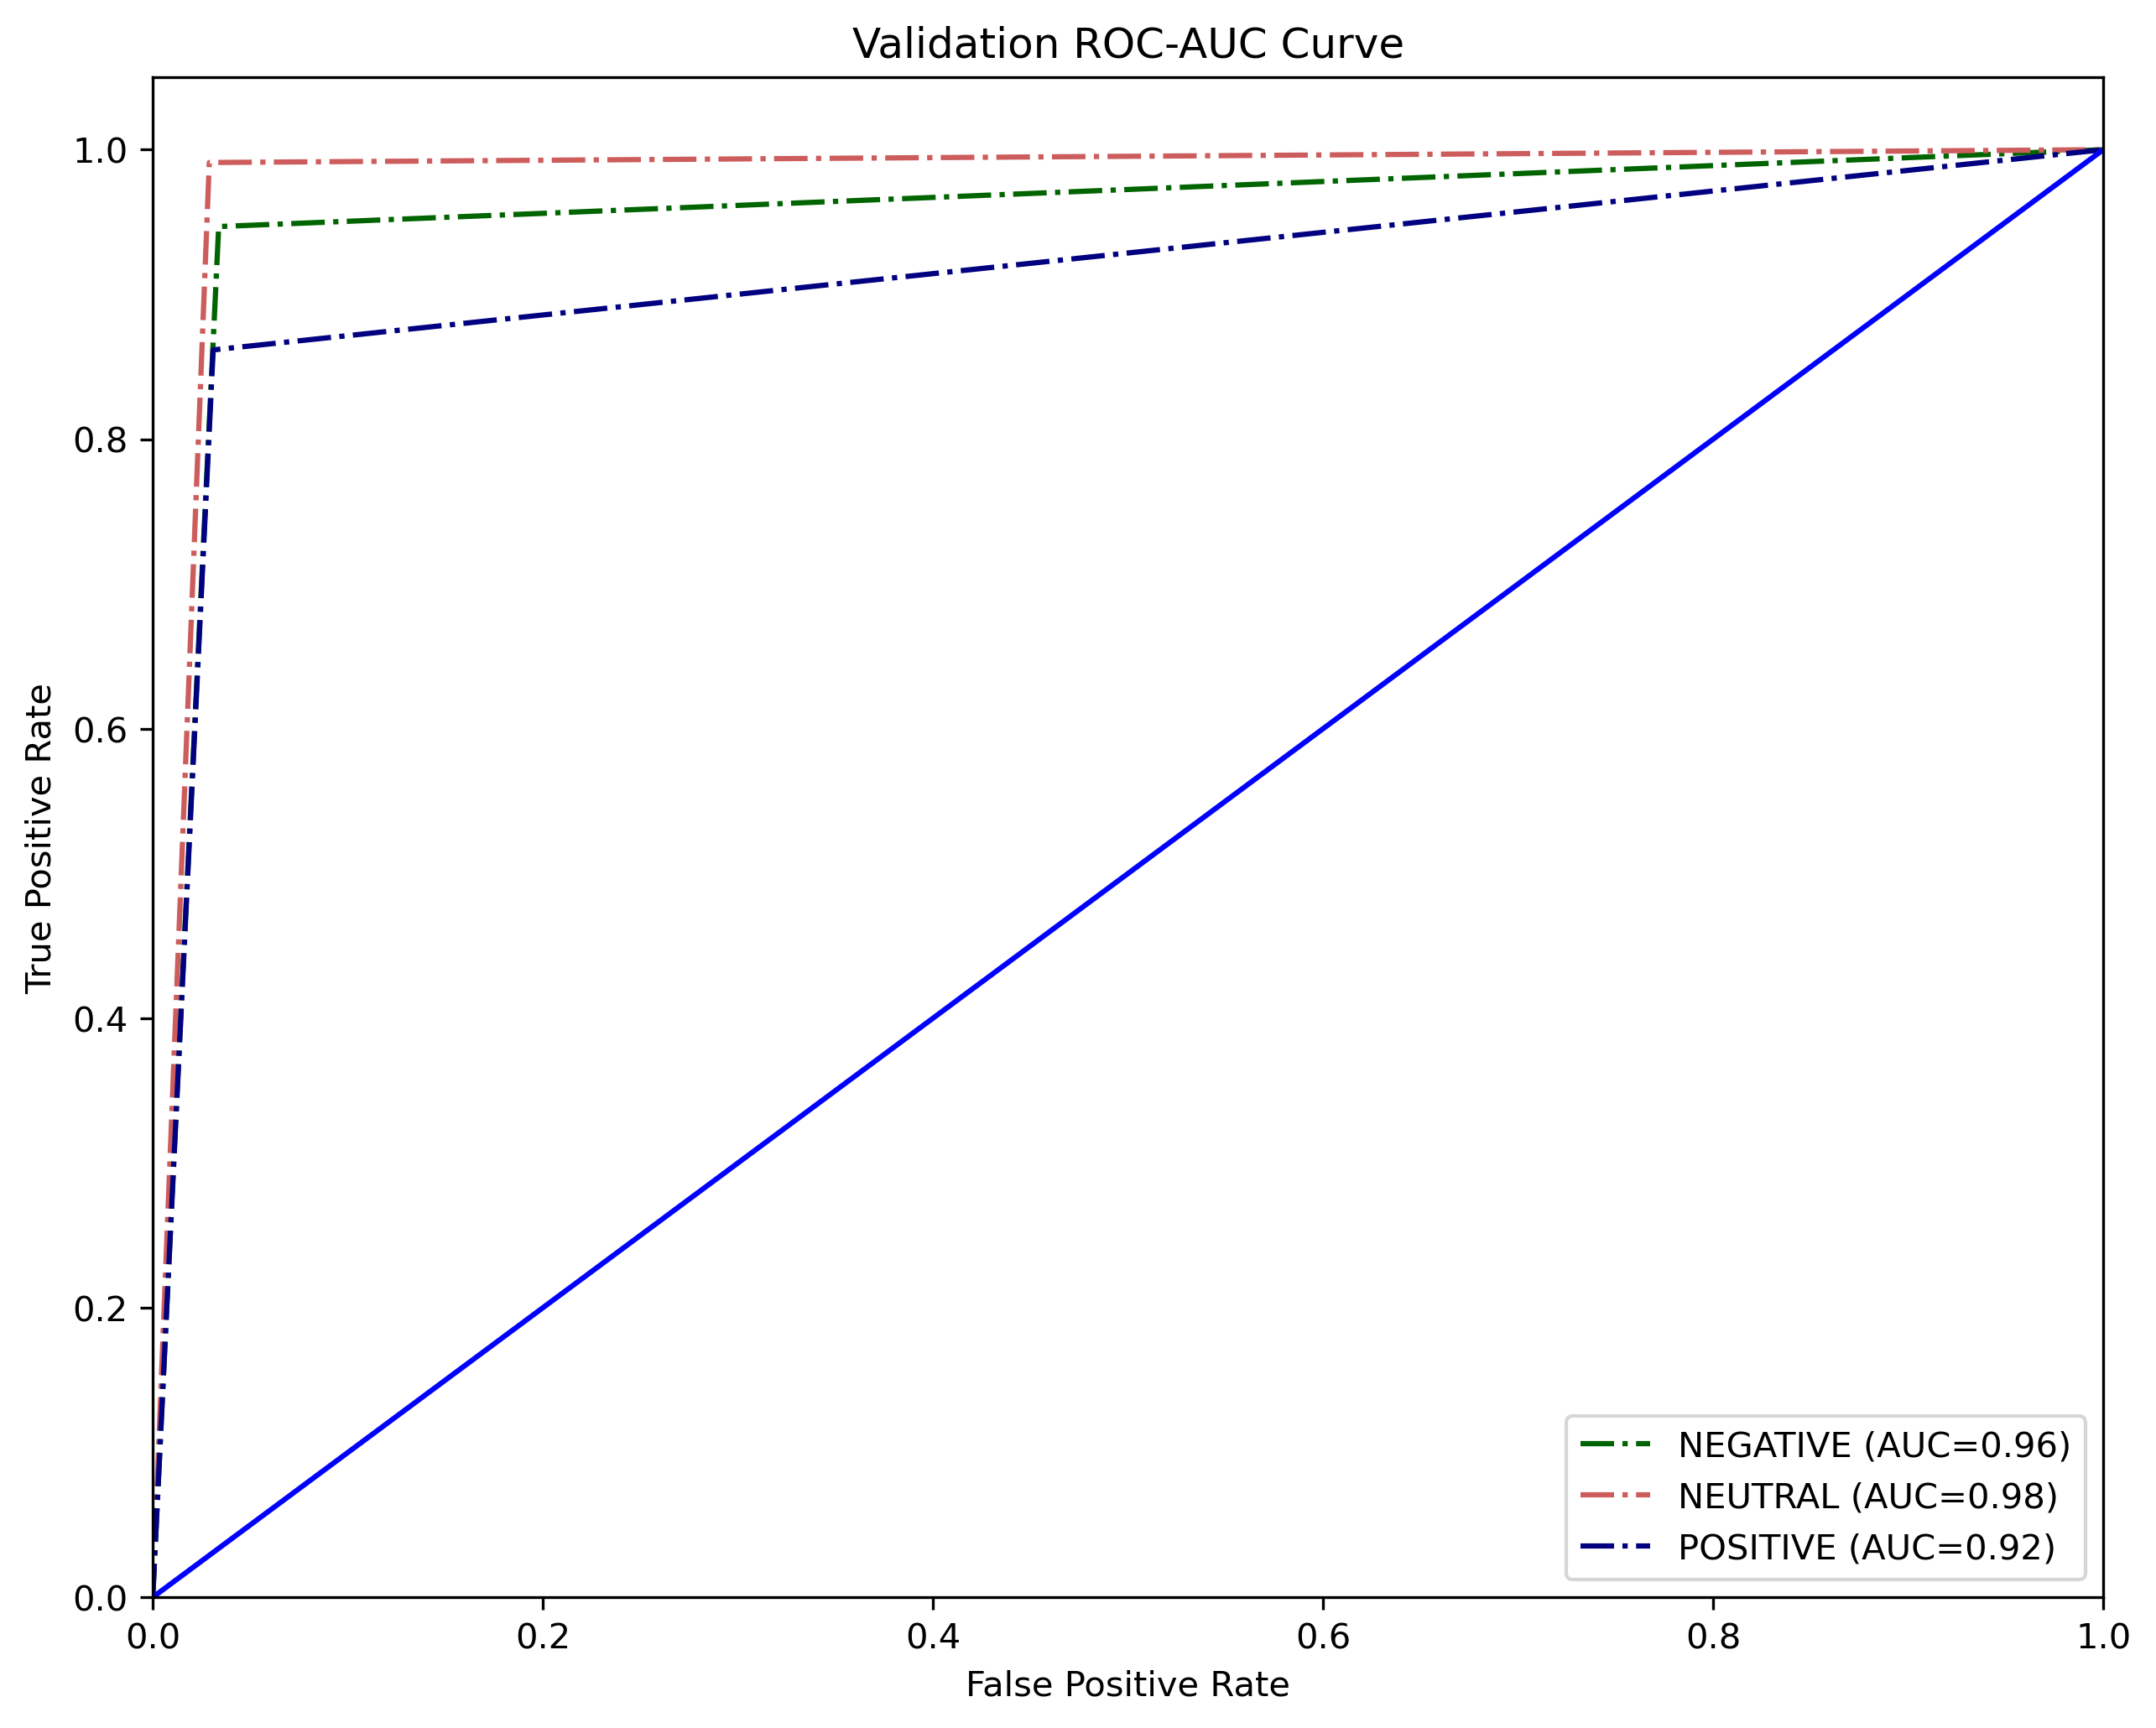

In [116]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(new_val[:,i],new_pred_val[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Validation ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Validation ROCAUC.png',dpi=300)

In [117]:
y1=y.flatten()
new_y=label_binarize(y1,classes=np.unique(y1))
new_pred_y=label_binarize(y_new,classes=np.unique(y_new))

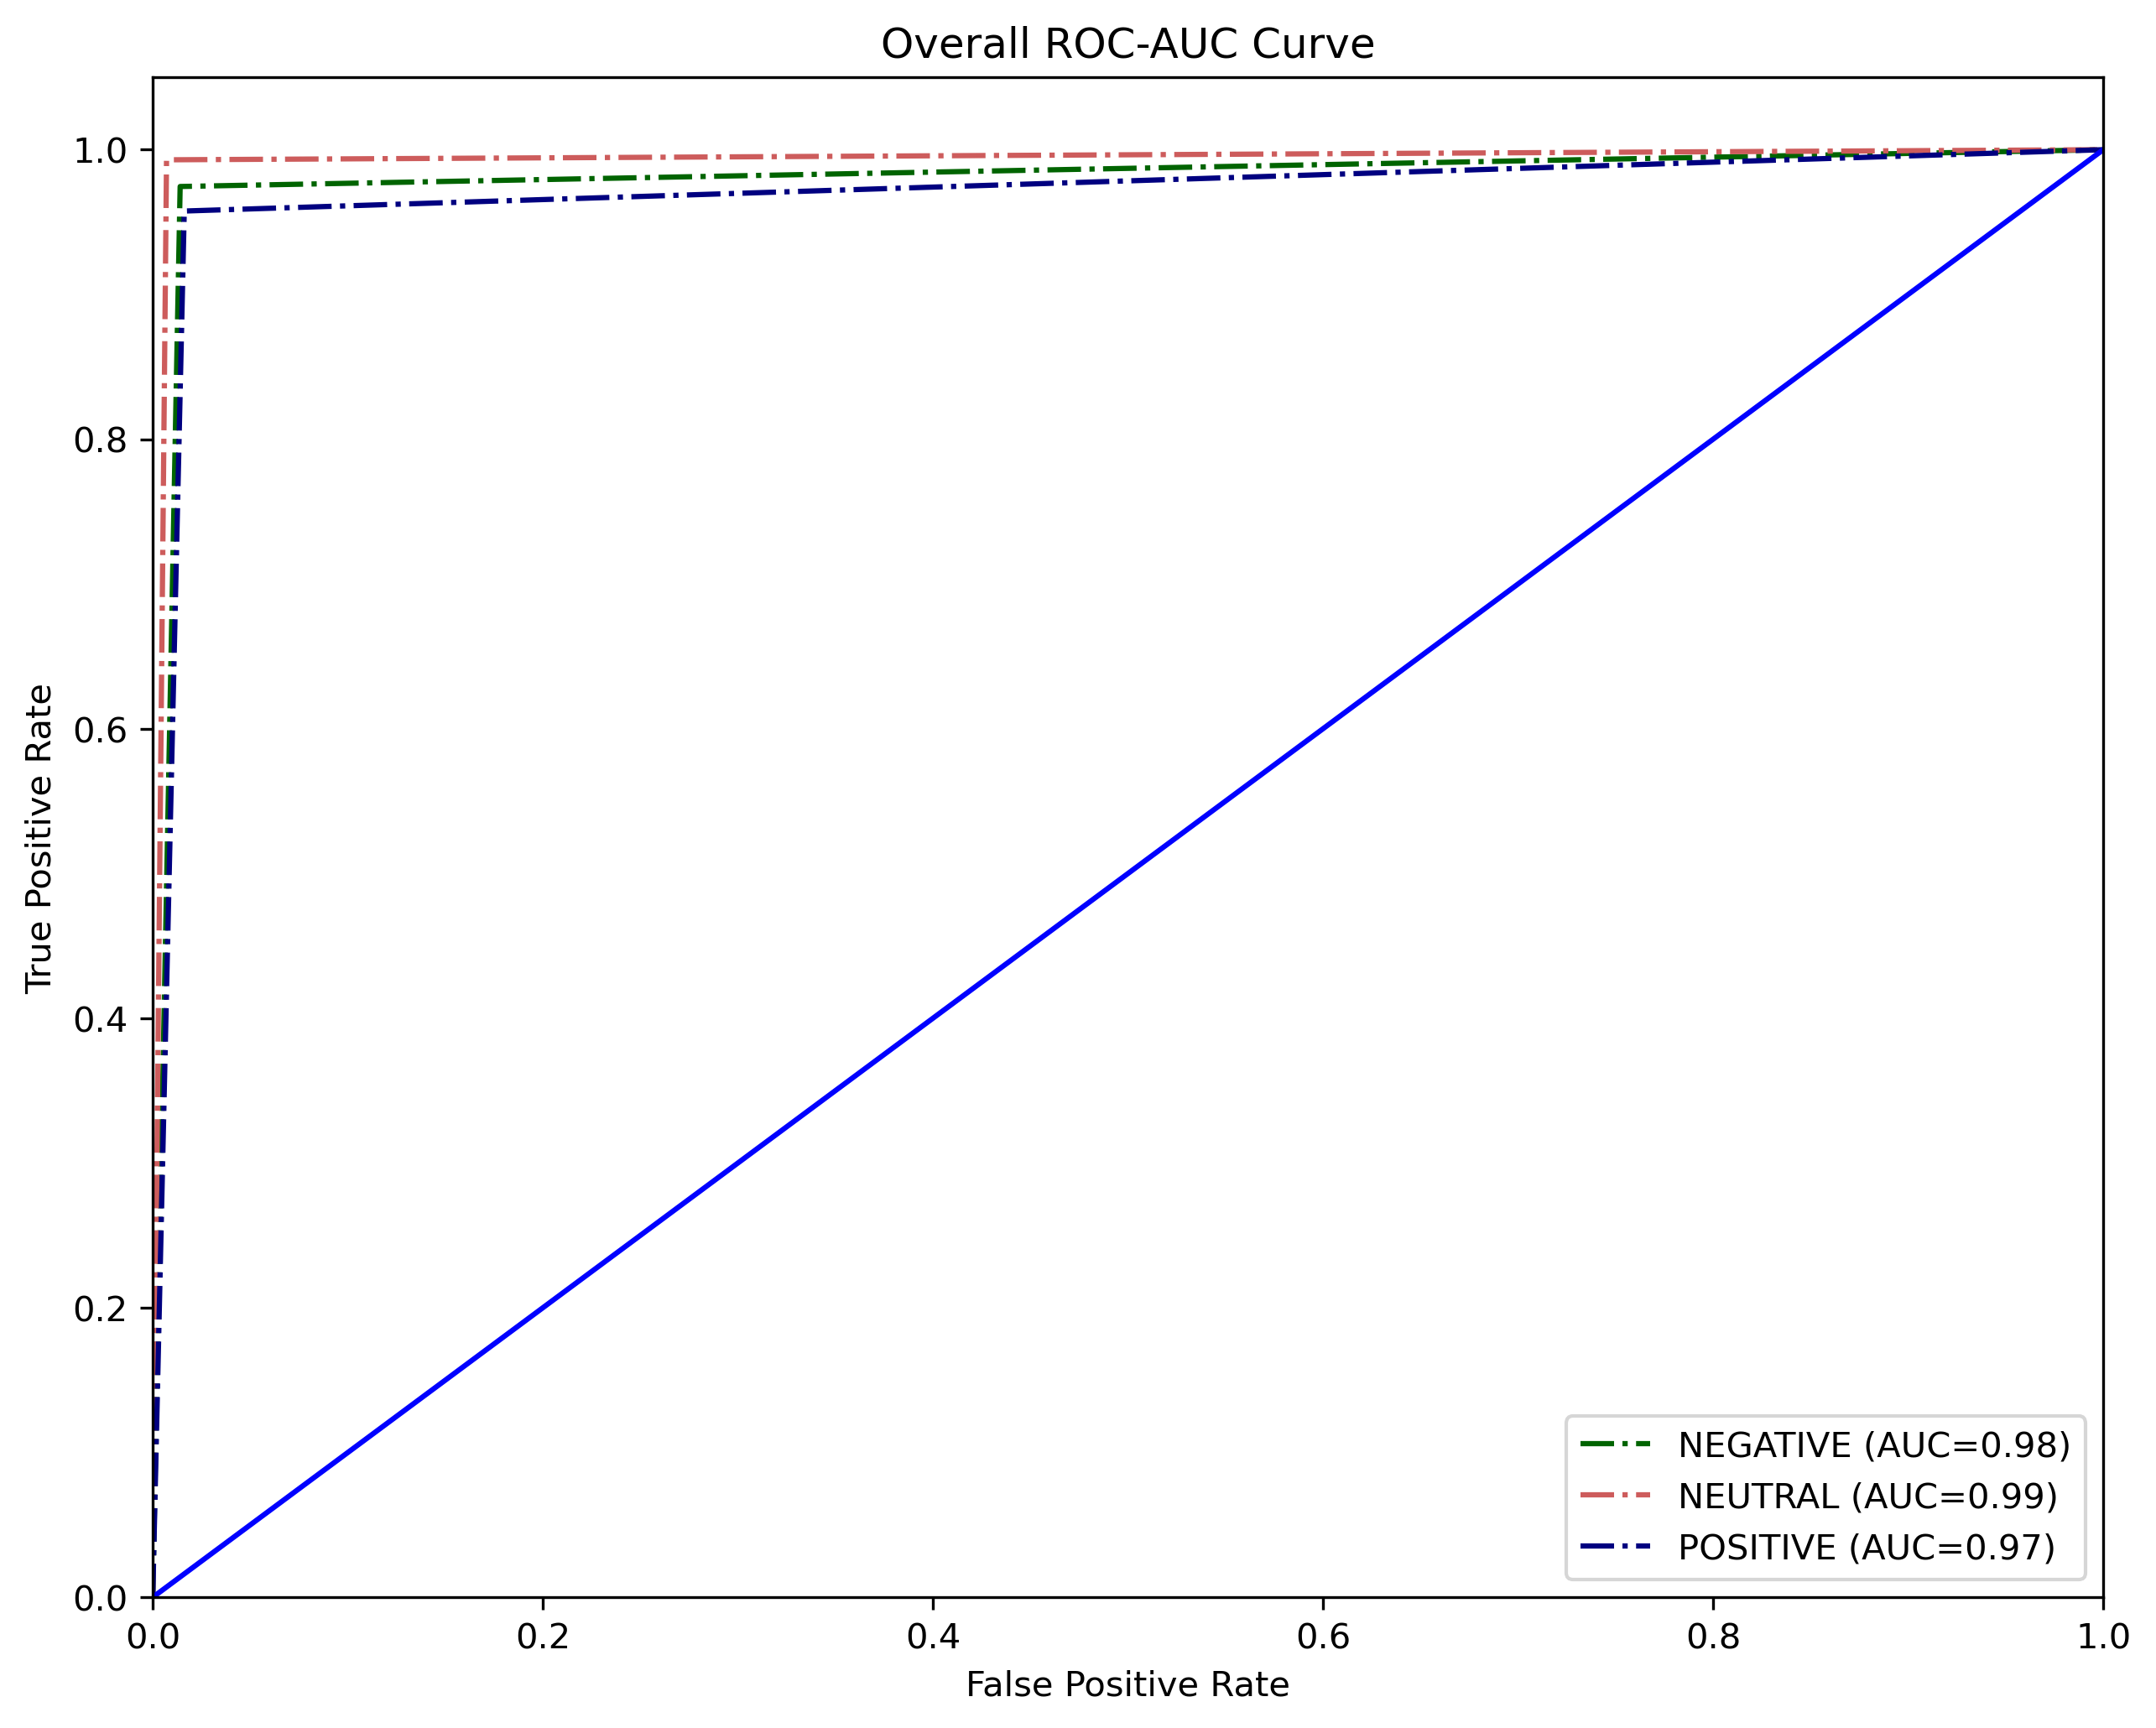

In [118]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(new_y[:,i],new_pred_y[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Overall ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Overall ROCAUC.png',dpi=300)